0.9999999999999999 -0.9499999999999997


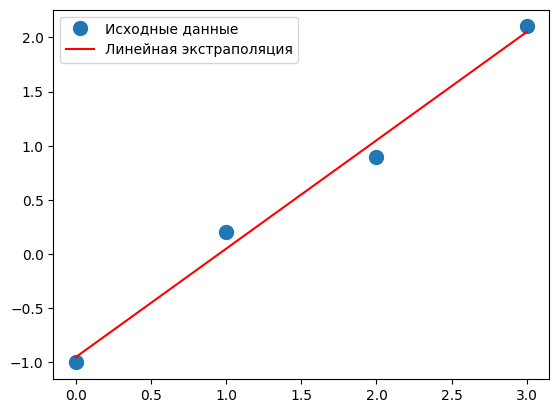

In [1]:
# EXAMPLE 1.1.1

import numpy as np
import matplotlib.pyplot as plt
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

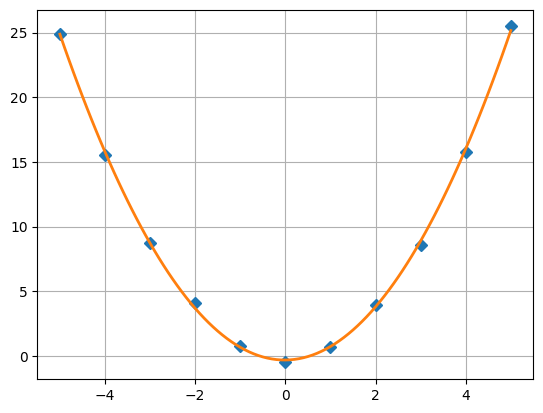

In [2]:
# EXAMPLE 1.1.2

from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

# print(x)
# print(y)

m = vstack((x**2, x, ones(11))).T


s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')

plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

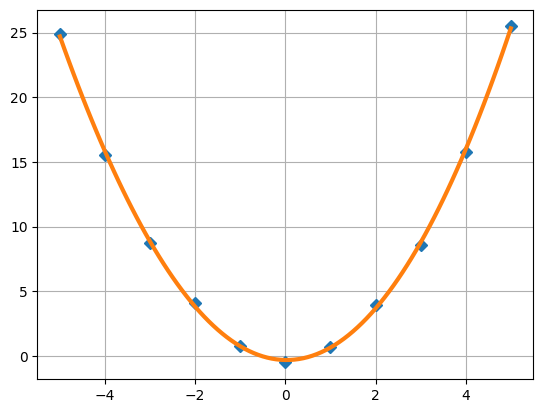

In [3]:
# EXAMPLE 1.1.3

m = vstack((x**3, x**2, x, ones(11))).T

s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')

plt.plot(x_prec, s[0]*x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('polinom_3.png')

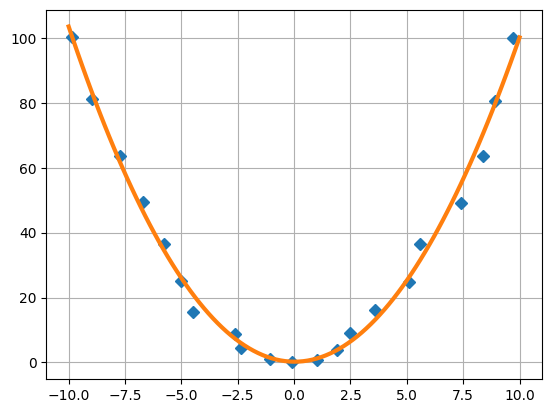

In [4]:
# EXERCISE 1.1.3

from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt



x = linspace(-10,10,21)
y = x**2 + 1.0 * (rand(21) - 0.5)
x+= delta * (rand(21) - 0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')


m = vstack((x**3, x**2, x, ones(21))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-10, 10, 101)

plt.plot(x,y,'D')

plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], '-', lw = 3)
plt.grid()
plt.savefig("парабола.png")

0.00022013608225162834
0.11810016494706409


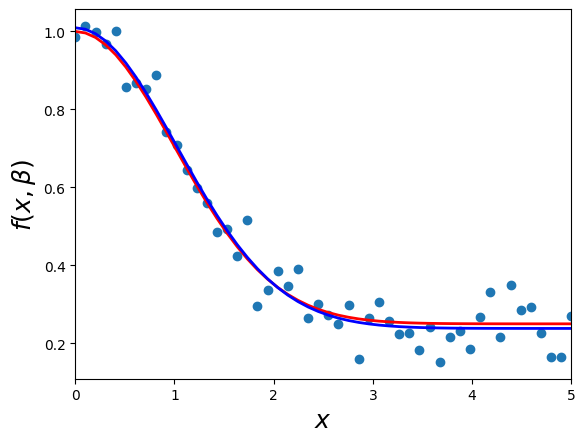

In [5]:
# EXAMPLE 1.1.4
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)

from scipy.optimize import curve_fit 
import scipy as sp
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x ** 2)

# зададим массив из точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
# Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное уравнение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [6]:
print(xdata)
print(ydata)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.98571273 1.01417078 0.99868363 0.96828173 1.00179776 0.85785733
 0.86661365 0.85223937 0.88768203 0.74238595 0.70853187 0.64479725
 0.59906601 0.56064613 0.48639181 0.49312409 0.42423565 0.51674663
 0.29532114 0.33616856 0.38562784 0.34789674 0.39077324 0.26409746
 0.30045453 0.27334232 0.25069315 0.29918698 0.15925188 0.26550336
 0.30687893 0.25680963 0.22508463 0.22571707 0.18247105 0.24198598
 0.1523101  0.2155281  0.23101836 0.18

[0.21901953 0.75825211]
0.00013628793332616878
0.11983939225913044


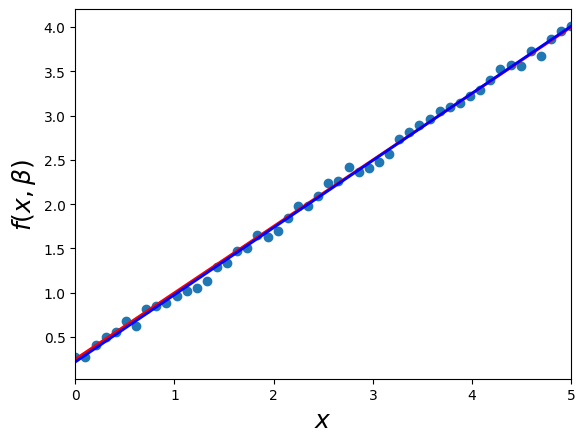

In [7]:
# EXAMPLE 1.1.5
#1

beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.26123471 0.74753956 0.50027197]
0.00017345744597732784
0.1446453481369548


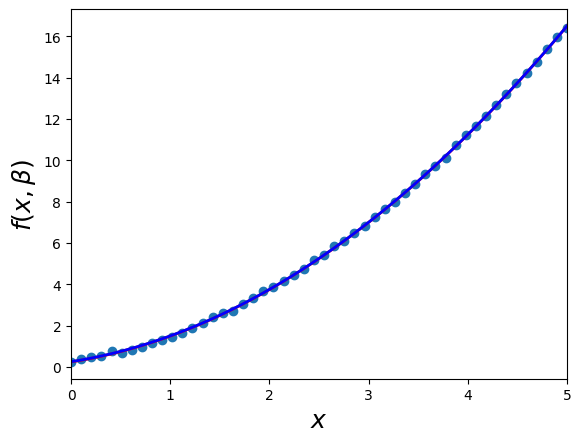

In [8]:
# 2

beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x

xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)

plt.show()

[1.00085857 2.00689573]
5.33220525522255e-05
0.1233041284714131


Text(0, 0.5, '$f(x, \\beta)$')

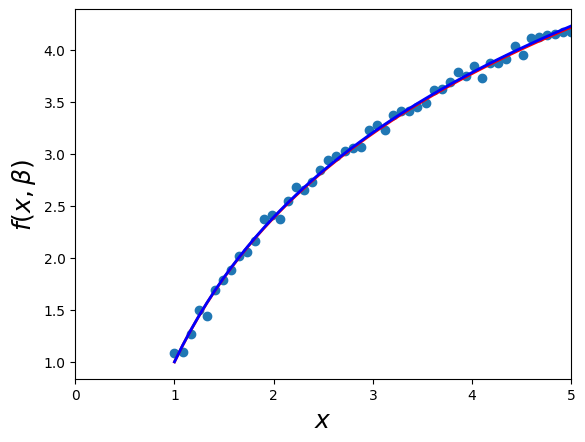

In [9]:
# 3

beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
xdata = np.linspace(1, 5, 50)

y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)


5.33220525522255e-05
0.1065279021903625


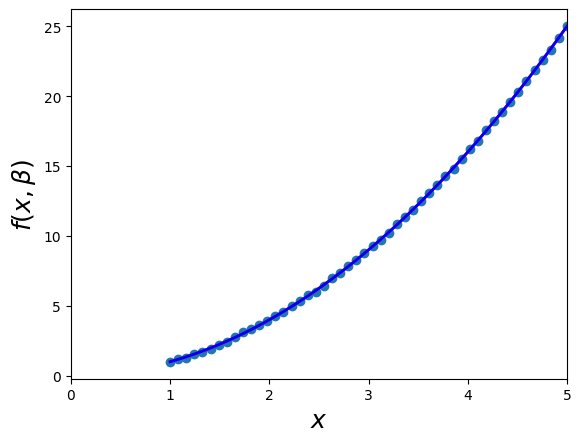

In [10]:
#4
beta=(1, 2)
def f(x, b0, b1):
    return b0 * x ** b1

xdata=linspace(1, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

(20, 2)


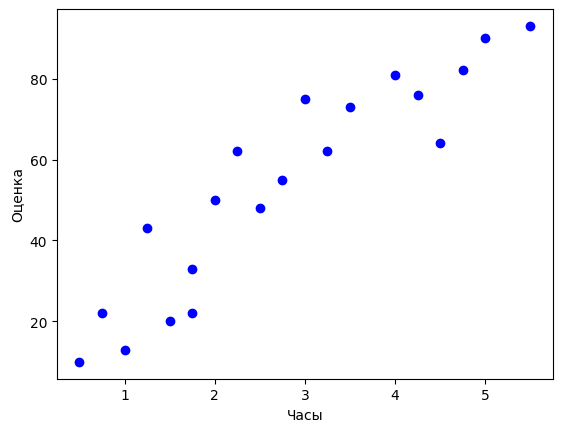

11.564766839378237
[15.64766839]


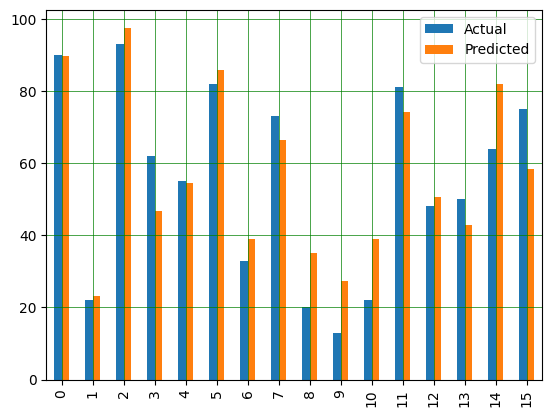

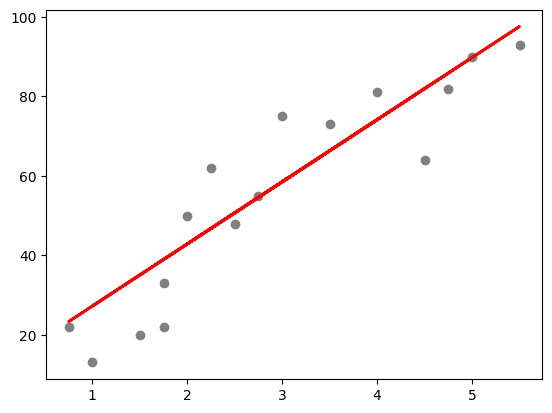

In [13]:
# Импортируем необходимые библиотеки
# используем pandas и numpy для обработки данных,
# matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваеимостью
my_dict = {'Учебное время':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
        "Оценка":[10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}



dataset = pd.DataFrame(my_dict)
dataset.head()

# Исследуем набор данных
print(dataset.shape)
dataset.describe()

# Нарисуем точечную диаграмму
plt.scatter(dataset["Учебное время"],dataset['Оценка'],color ='b',label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

'''
После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:
'''

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

# Теперь когда у нас есть атрибуты и метки, необходимо разделить их на a обучающий и тестовый наборы
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 0)

# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})

# визуазилируем результат сравнения в виде гистограммы
df.plot(kind = 'bar')
plt.grid(which='major', linestyle = '-', linewidth ='0.5', color = 'green')
plt.grid(which='minor', linestyle = ':', linewidth ='0.5', color = 'black')
plt.show()

# построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth=2)
plt.show()

(30, 2)


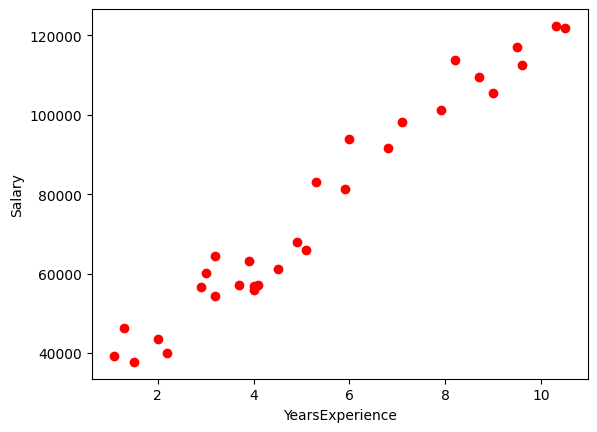

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
25825.984232150113
[9133.88237036]


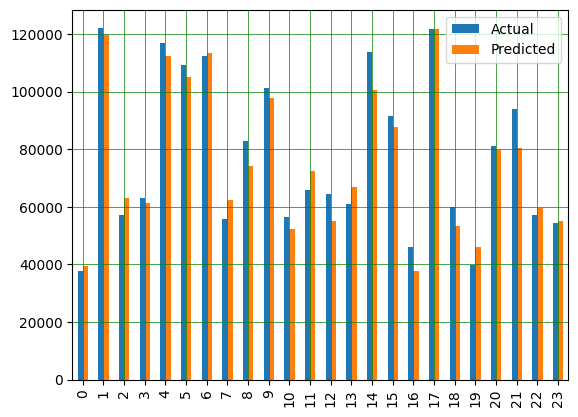

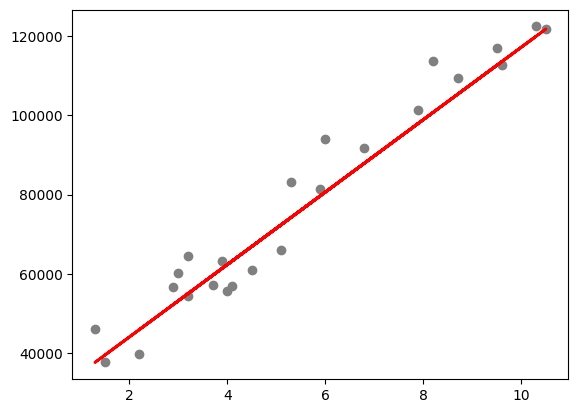

In [14]:
# EXERCISE 
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
df = pd.read_csv(url)

print(df.shape)
df.describe()

plt.scatter(df['YearsExperience'], df['Salary'], color='r', label='diagram')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

plt.show()

x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(x_test)

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1


df1.plot(kind = 'bar')
plt.grid(which='major', linestyle = '-', linewidth ='0.5', color = 'green')
plt.grid(which='minor', linestyle = ':', linewidth ='0.5', color = 'black')
plt.show()

# построим линию регрессии с тестовыми данными
plt.scatter(x_test, y_test, color = 'gray')
plt.plot(x_test, y_pred, color = 'red', linewidth=2)
plt.show()

In [16]:
#задание
url1 = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'


dataset1 = pd.read_csv(url1)
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.2, random_state = 0)

# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземляр и вызвать метод fit()
regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)

y_pred1 = regressor1.predict(X_test1)
# сравним фактические значения с прогнозируемыми
df1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
display(df1)

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302
